# 2.3.2 Graphical Solutions

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1xrSfXT6urT3Qr4QzAII51uQI8fqDG9ye?usp=sharing)

Let us first consider a maximization problem:

$$
\begin{align*}
\text{maximize} \quad & z = 3x_1 + x_2 \\
\text{subject to} \quad &  x_2 \leq 5 \\  
& x_1 + x_2 \leq 10 \\
& -x_1 + x_2 \geq -2 \\
& x_1, x_2 \geq 0 
\end{align*}
$$

Each inequality constraint defines a half-plane in two dimensions, and the intersection of these half-planes comprises the feasible space for this case, as shown by the shaded area in **Figure 2.1**.

The points labeled A, B, C, D, and E are called **extreme points** of the feasible region. It is a property of linear programming problems that, if a unique optimal solution exists, it occurs at one of the extreme points of the feasible space.

For this small problem, it is not impractical simply to evaluate the objective function at each of these points, and select the maximum:

$ z_A = z(0, 0) = 3 \times 0 + 0 = 0 $  
$ z_B = z(0, 5) = 3 \times 0 + 5 = 5 $
<br />
<br />

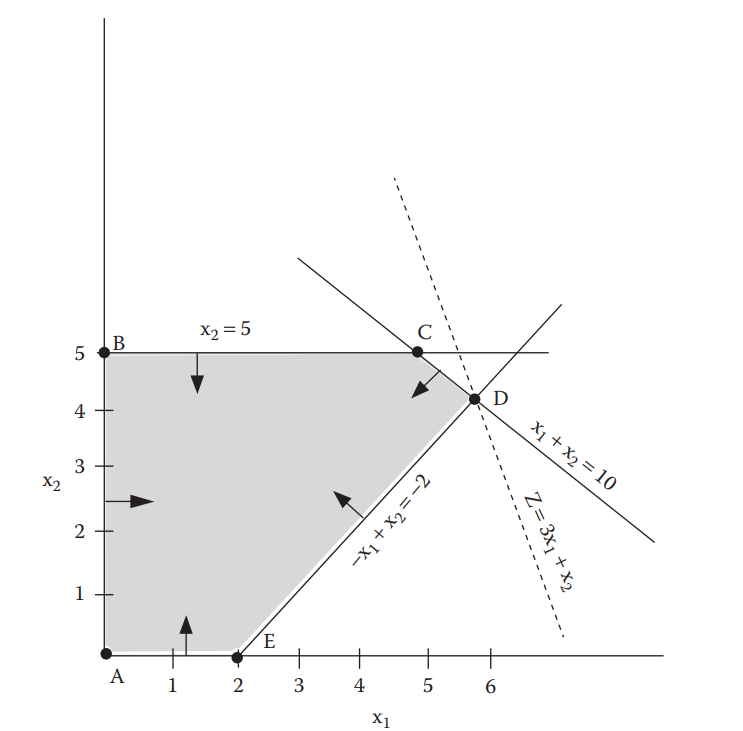

<br />
FIGURE 2.1
<br />

Graphical solution
<br />

$ z_C = z(5, 5) = 3 \times 5 + 5 = 20 $  
$ z_D = z(6, 4) = 3 \times 6 + 4 = 22 $  
$ z_E = z(2, 0) = 3 \times 2 + 0 = 6 $

The optimal solution lies at extreme point D where $( x_1 = 6 )$ and $( x_2 = 4 )$, and the optimal value of the objective function is denoted by $( z^* = 22 )$.

Without evaluating $( z )$ at every extreme point, we may more simply observe that the line specified by the objective function $( 3x_1 + x_2 )$ has a slope of $−3$. At optimality, this line is tangent to the feasible space at one of the extreme points. In **Figure 2.1**, the dashed line represents the objective function at the optimal point D.


**Code Implementation**

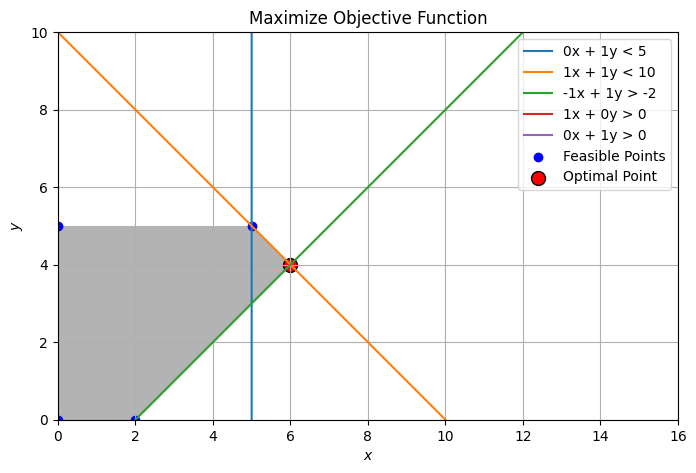

In [1]:
import numpy as np  
import matplotlib.pyplot as plt
from itertools import combinations
import ipywidgets as widgets

# Import the 'display' function from IPython.display to show UI elements in the output.
from IPython.display import display
def find_intersection(line1, line2):
    """
    Finds the intersection point of two lines represented in the form (a, b, c) where ax + by = c.

    Args:
        line1: Tuple (a, b, c) representing the first line.
        line2: Tuple (a, b, c) representing the second line.

    Returns:
        A NumPy array representing the intersection point (x, y), or None if the lines are parallel.
    """
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])  # Create a matrix of coefficients
    b = np.array([line1[2], line2[2]])  # Create a vector of constants
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)  # Solve the system of equations to find the intersection

def is_feasible(point, constraints):
    """
    Checks if a point (x, y) is feasible (satisfies all constraints).

    Args:
        point: Tuple (x, y) representing the point.
        constraints: A list of tuples, each representing a constraint in the form (a, b, c, sign).

    Returns:
        True if the point is feasible, False otherwise.
    """
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):  # Check if the point violates a '<=' constraint
            return False
        if sign == '>' and not (a * x + b * y >= c):  # Check if the point violates a '>=' constraint
            return False
    return True  # Point satisfies all constraints

def find_optimal_points(obj_type, a, b, constraints):
    """
    Finds all feasible points and the optimal point.

    Args:
        obj_type: String, either "maximize" or "minimize", indicating the objective.
        a: Coefficient of x in the objective function.
        b: Coefficient of y in the objective function.
        constraints: A list of tuples, each representing a constraint.

    Returns:
        A tuple containing:
            - A NumPy array of feasible points.
            - The optimal point as a NumPy array.
    """
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):  # Iterate through all pairs of constraints
        intersection = find_intersection(line1, line2)  # Find their intersection
        if intersection is not None and is_feasible(intersection, constraints):  # Check if feasible
            feasible_points.append(intersection)

    feasible_points = np.array(feasible_points)
    if feasible_points.size == 0:
        print("No feasible region found")
        return np.array([]), None

    obj_values = [a * x + b * y for x, y in feasible_points]  # Calculate objective function values
    optimal_index = np.argmax(obj_values) if obj_type == "maximize" else np.argmin(obj_values)  # Find optimal index
    optimal_point = feasible_points[optimal_index]  # Get the optimal point
    return feasible_points, optimal_point

def plot_feasible_region(constraints, x_range, y_range):
    """
    Plots the feasible region defined by the constraints.

    Args:
        constraints: A list of tuples, each representing a constraint.
        x_range: A NumPy array of x-values for the plot.
        y_range: A NumPy array of y-values for the plot.
    """
    x, y = np.meshgrid(x_range, y_range)  # Create a grid of points
    feasible_region = np.ones_like(x, dtype=bool)  # Initialize feasible region as all True

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)  # Update feasible region based on '<=' constraints
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)  # Update feasible region based on '>=' constraints

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()),
               origin="lower", cmap="Greys", alpha=0.3)  # Plot the feasible region

def plot_constraints(constraints, x_range):
    """
    Plots the lines representing the constraints.

    Args:
        constraints: A list of tuples, each representing a constraint.
        x_range: A NumPy array of x-values for the plot.
    """
    for a, b, c, sign in constraints:
        y_vals = np.linspace(0, 10, 2000)  # Generate y-values for the line
        if a != 0:
            x_vals = (c - b * y_vals) / a  # Calculate corresponding x-values
        else:
            x_vals = np.full_like(y_vals, c / b)  # Handle vertical lines (a = 0)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')  # Plot the line

def graphical_method(obj_type, a, b, constraints):
    """
    Solves a linear programming problem graphically and displays the solution.

    Args:
        obj_type: String, either "maximize" or "minimize", indicating the objective.
        a: Coefficient of x in the objective function.
        b: Coefficient of y in the objective function.
        constraints: A list of tuples, each representing a constraint.
    """
    x_range = np.linspace(0, 16, 300)  # Define the range of x-values for the plot
    y_range = np.linspace(0, 10, 300)  # Define the range of y-values for the plot
    plt.figure(figsize=(8, 8))  # Create a figure for the plot
    plot_feasible_region(constraints, x_range, y_range)  # Plot the feasible region
    plot_constraints(constraints, x_range)  # Plot the constraint lines

    feasible_points, optimal_point = find_optimal_points(obj_type, a, b, constraints)  # Find feasible and optimal points

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)  # Extract x and y coordinates of feasible points
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')  # Plot feasible points

    if optimal_point is not None:
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')  # Plot optimal point

    plt.xlim(0, 16)  # Set x-axis limits
    plt.ylim(0, 10)  # Set y-axis limits
    plt.xlabel(r'$x$')  # Label x-axis
    plt.ylabel(r'$y$')  # Label y-axis
    plt.legend(loc='upper right')  # Place legend in upper right corner
    plt.title(f"{obj_type.capitalize()} Objective Function")  # Set plot title
    plt.grid(True)  # Show grid
    plt.show()  # Display the plot



def solve_example():
    """
    Defines and solves an example linear programming problem.
    """
    # Example problem definition: objective function, coefficients, and constraints
    example = [
        ("maximize", 3, 1, [(0, 1, 5, '<'), (1, 1, 10, '<'), (-1, 1, -2, '>'), (1, 0, 0, '>'), (0, 1, 0, '>')])
    ]

    # Solve the example problem using the graphical method
    for obj_type, a, b, constraints in example:
        graphical_method(obj_type, a, b, constraints)


solve_example() # Call the solve_example function to run the code

Next, we use the same graphical technique to solve a minimization problem:

$$
\begin{align*}
\text{minimize}  \quad & z = x_1 + x_2 \\
\text{subject to} \quad & 3x_1 + x_2 \geq 6 \\
 & x_2 \geq 3 \\ 
 & x_1 \leq 4 \\
 & x_1, x_2 \geq 0
 \end{align*} 
$$

The shaded area in **Figure 2.2** denotes the feasible region, which in this case is unbounded.

<br />

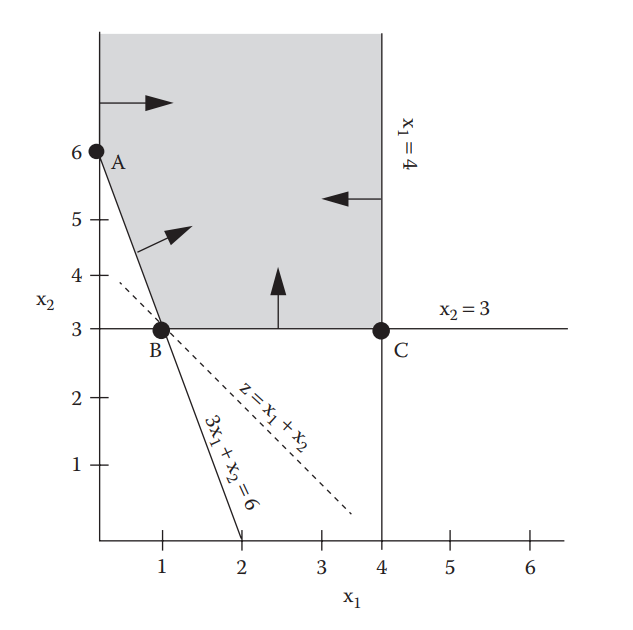

<br />
FIGURE 2.2
<br />

Unbounded feasible region
<br />

The minimal solution must occur at one of the extreme points A, B, or C. The objective function $( x_1 + x_2 )$, with a slope of $−1$, is tangent to the feasible region at extreme point B. Therefore, the optimal solution occurs at $( x_1 = 1 )$ and $( x_2 = 3 )$, and the optimal objective function value at that point is $( z^* = 4 )$.

**Code Implementatopn**

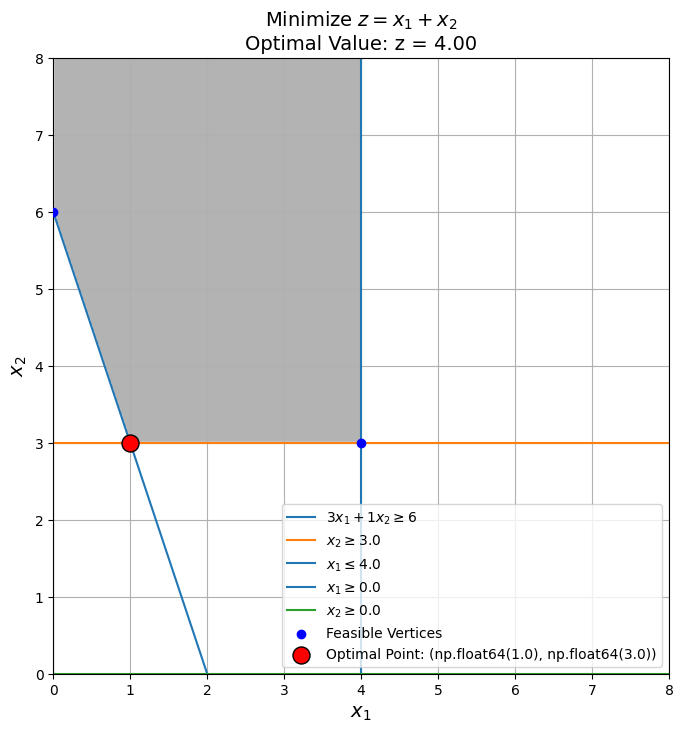

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import ipywidgets as widgets

def find_intersection(line1, line2):
    """Finds the intersection point of two lines defined as [a, b, c] for ax + by = c."""
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    """Checks if a point satisfies all given constraints."""
    x, y = point
    tol = 1e-9
    for a, b, c, sign in constraints:
        val = a * x + b * y
        if sign == '<' and val > c + tol:
            return False
        if sign == '>' and val < c - tol:
            return False
    return True

def find_optimal_points(obj_type, obj_coeffs, constraints):
    """Finds all feasible vertices and determines the optimal one."""
    feasible_vertices = []
    for line1, line2 in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_vertices.append(intersection)

    if not feasible_vertices:
        print("No feasible region found")
        return np.array([]), None

    feasible_vertices = np.array(feasible_vertices)
    obj_values = feasible_vertices @ obj_coeffs
    
    if obj_type == "maximize":
        optimal_index = np.argmax(obj_values)
    else:
        optimal_index = np.argmin(obj_values)
        
    optimal_point = feasible_vertices[optimal_index]
    return feasible_vertices, optimal_point

def plot_feasible_region(constraints, x_range, y_range):
    """Shades the feasible region on the plot."""
    x_mesh, y_mesh = np.meshgrid(x_range, y_range)
    feasible = np.ones_like(x_mesh, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible &= (a * x_mesh + b * y_mesh <= c)
        elif sign == '>':
            feasible &= (a * x_mesh + b * y_mesh >= c)

    plt.imshow(feasible, extent=(x_range.min(), x_range.max(), y_range.min(), y_range.max()),
               origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range, y_range):
    """Plots all constraint lines without raising SyntaxWarning."""
    for a, b, c, sign in constraints:
        # --- FIX: Using raw f-strings (fr"...") to prevent warnings ---
        label = fr'${a}x_1 + {b}x_2 \geq {c}$' if sign == '>' else fr'${a}x_1 + {b}x_2 \leq {c}$'
        if a == 0: label = fr'$x_2 \geq {c/b:.1f}$' if sign == '>' else fr'$x_2 \leq {c/b:.1f}$'
        if b == 0: label = fr'$x_1 \geq {c/a:.1f}$' if sign == '>' else fr'$x_1 \leq {c/a:.1f}$'
        # --- End of Fix ---

        if b != 0:
            y_vals = (c - a * x_range) / b
            plt.plot(x_range, y_vals, label=label)
        else:
            plt.axvline(x=c/a, label=label)

def graphical_method(obj_type, obj_coeffs, constraints):
    """Main function to orchestrate the solving and plotting."""
    x_range = np.linspace(-1, 10, 400)
    y_range = np.linspace(-1, 10, 400)
    
    plt.figure(figsize=(8, 8))
    
    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range, y_range)

    feasible_points, optimal_point = find_optimal_points(obj_type, obj_coeffs, constraints)

    if feasible_points.size > 0:
        plt.scatter(feasible_points[:, 0], feasible_points[:, 1], color='blue', zorder=5, label='Feasible Vertices')

    if optimal_point is not None:
        plt.scatter(*optimal_point, color='red', s=150, zorder=6, label=f'Optimal Point: {tuple(np.round(optimal_point,2))}', edgecolors='black')
        optimal_value = obj_coeffs @ optimal_point
        plt.title(f"Minimize $z = x_1 + x_2$\nOptimal Value: z = {optimal_value:.2f}", size=14)

    plt.xlim(0, 8)
    plt.ylim(0, 8)
    plt.xlabel('$x_1$', size=14)
    plt.ylabel('$x_2$', size=14)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

def solve_this_problem():
    """Defines the specific LP problem from the image and solves it."""
    obj_type = "minimize"
    obj_coeffs = np.array([1, 1])
    constraints = [
        (3, 1, 6, '>'),
        (0, 1, 3, '>'),
        (1, 0, 4, '<'),
        (1, 0, 0, '>'),
        (0, 1, 0, '>')
    ]
    graphical_method(obj_type, obj_coeffs, constraints)

# --- Run the Solution ---
solve_this_problem()